# Analisis Exploratorio de Datos - *Cartera castigada*

In [2]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
import xlrd

from scipy import stats

In [45]:
df = pd.read_csv("data/Punished_portfolio_data.csv", sep = '|')
df.shape

(48982, 50)

In [46]:
df

,IDSOLICITUD,FECHAENTRADA,FECHASALIDA,FECHAACTUALIZACION,FECHAMORADESDE,NROCUOTASMORA,NUMDIASMORA_ACT,VALORCUOTA,SALDOTOTALMORA1_ACT,SALDOTOTAL_ACT,...,fecha Venc Cuota Vigente,Valor Cuota Vigente,No. ACUERDOS DE PAGO,RazonSocial,UltimoPeriodoCotizado,FechaFosyga,Hora_ContactoEfectivo,Llamadas_recibidas,Llamadas_realizadas,Tipificacion
0,280,2020-11-17,NaN,2020-11-17,NaN,0.0,6.0,218384.59,231102.87,4248178.84,...,10/02/2020 0:00,287094,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NO CONTACTADO_BUZON_NAN_NAN
1,372,2020-11-10,2020-11-17,2020-11-17,NaN,0.0,0.0,145209.36,0.00,11004369.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,EFECTIVO_REALIZA ACUERDO DE PAGO_ABONO PAGO VE...
2,1132,2020-11-10,2020-11-17,2020-11-17,NaN,0.0,11.0,167036.95,269.36,6514205.03,...,20/02/2020 0:00,0,8.0,NaN,NaN,NaN,7.0,10.0,30.0,EFECTIVO_YA PAGO_PENDIENTE CONDONACI N_NAN
3,3518,2020-11-01,2020-11-17,2020-11-17,2020-03-05 00:00:00,7.0,0.0,186526.37,0.00,1187551.21,...,NaN,0,6.0,NaN,NaN,NaN,10.0,12.0,25.0,EFECTIVO_CR DITOS NO ASIGNADOS_INFORMACI N GEN...
4,5648,2020-11-17,NaN,2020-11-17,2020-10-10 00:00:00,1.0,6.0,331863.91,223180.79,2155653.88,...,10/02/2020 0:00,0,2.0,INDRA COLOMBIA S A S,2020-10,2020-10-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48977,1214479,2018-11-01,2019-11-12,2018-11-01,43200,6.0,174.0,204986.00,1316691.00,7749086.22,...,10/02/2020 0:00,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48978,1522420,2018-11-01,2019-11-12,2018-11-01,42202,39.0,1202.0,132792.00,6704498.00,12144201.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO EFECTIVO_NO LO CONOCEN_NAN_NAN
48979,1731356,2018-11-01,2019-11-12,2018-11-01,42264,13.0,1140.0,72108.00,1341981.59,1341981.59,...,NaN,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48980,1733481,2018-11-01,2019-11-12,2018-11-01,42355,34.0,1049.0,84446.00,3479513.00,6341023.00,...,NaN,0,2.0,NaN,NaN,NaN,NaN,2.0,3.0,EFECTIVO_CR DITO ADMINISTRATIVO_NAN_NAN


# Vista General Valores Faltantes

Text(200.0, 0.5, 'Fila')

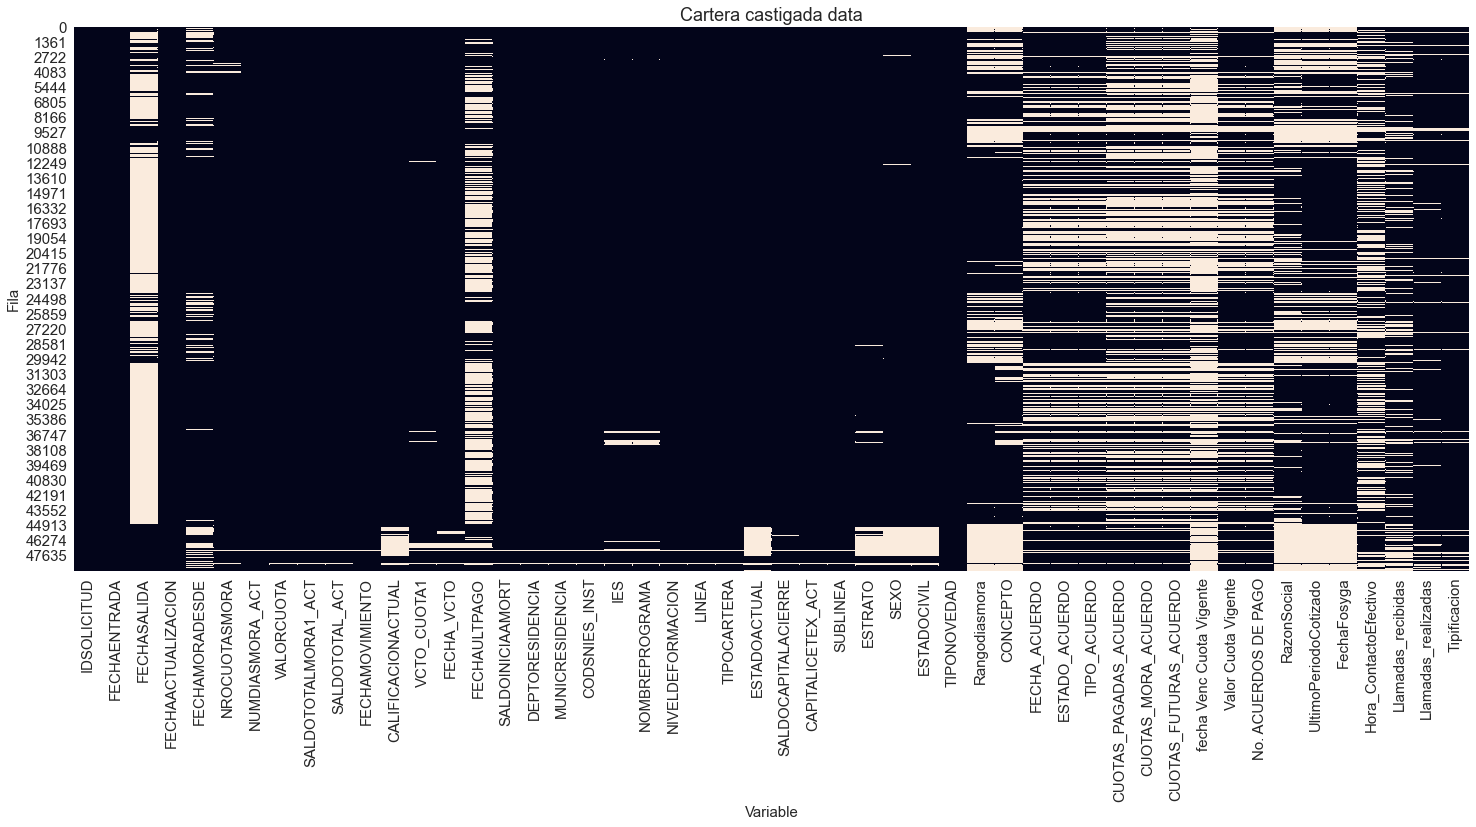

In [47]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Cartera castigada data")
plt.xlabel('Variable')
plt.ylabel('Fila')

## %Nulos

In [48]:
Nulos = round(df.isnull().sum()/len(df.index)*100,2)
Nulos

IDSOLICITUD                  0.00
FECHAENTRADA                 0.00
FECHASALIDA                 76.31
FECHAACTUALIZACION           0.00
FECHAMORADESDE              14.20
NROCUOTASMORA                1.33
NUMDIASMORA_ACT              0.15
VALORCUOTA                   0.65
SALDOTOTALMORA1_ACT          0.65
SALDOTOTAL_ACT               0.65
FECHAMOVIMIENTO              0.15
CALIFICACIONACTUAL           5.29
VCTO_CUOTA1                  2.11
FECHA_VCTO                   2.02
FECHAULTPAGO                58.88
SALDOINICIAAMORT             0.68
DEPTORESIDENCIA              0.72
MUNICRESIDENCIA              0.73
CODSNIES_INST                0.65
IES                          2.32
NOMBREPROGRAMA               2.34
NIVELDEFORMACION             0.68
LINEA                        0.65
TIPOCARTERA                  0.65
ESTADOACTUAL                 5.94
SALDOCAPITALACIERRE          0.75
CAPITALICETEX_ACT            0.65
SUBLINEA                     0.65
ESTRATO                      6.13
SEXO          

# Tipos de Variables

In [49]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48982 entries, 0 to 48981
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IDSOLICITUD               48982 non-null  int64  
 1   FECHAENTRADA              48982 non-null  object 
 2   FECHASALIDA               11606 non-null  object 
 3   FECHAACTUALIZACION        48982 non-null  object 
 4   FECHAMORADESDE            42027 non-null  object 
 5   NROCUOTASMORA             48331 non-null  float64
 6   NUMDIASMORA_ACT           48908 non-null  float64
 7   VALORCUOTA                48663 non-null  float64
 8   SALDOTOTALMORA1_ACT       48663 non-null  float64
 9   SALDOTOTAL_ACT            48663 non-null  float64
 10  FECHAMOVIMIENTO           48908 non-null  object 
 11  CALIFICACIONACTUAL        46390 non-null  object 
 12  VCTO_CUOTA1               47948 non-null  object 
 13  FECHA_VCTO                47992 non-null  object 
 14  FECHAU

In [50]:
from datetime import datetime, timedelta
def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

#import re
#df['Valor Cuota Vigente'] = df['Valor Cuota Vigente'].replace(np.nan,0)
#df['Valor Cuota Vigente'] = df['Valor Cuota Vigente'].map(lambda x:re.sub("[^0-1','0-1$]", ".", str(x)))
#df['Valor Cuota Vigente'] = df['Valor Cuota Vigente'].map(lambda x:int(x))
#df['Valor Cuota Vigente'] = df['Valor Cuota Vigente'].replace(0,np.nan)
#df['Valor Cuota Vigente'].dtypes

In [61]:
df['FECHAENTRADA'] = df['FECHAENTRADA'].astype('<M8[ns]')
df['FECHASALIDA'] = df['FECHASALIDA'].astype('<M8[ns]')
df['FECHAACTUALIZACION'] = df['FECHAACTUALIZACION'].astype('<M8[ns]')
df['FECHA_ACUERDO'] = df['FECHA_ACUERDO'].astype('<M8[ns]')
df['fecha Venc Cuota Vigente'] = df['fecha Venc Cuota Vigente'].astype('<M8[ns]')
df['FechaFosyga'] = df['FechaFosyga'].astype('<M8[ns]')

In [62]:
m = df['FECHAMORADESDE'].astype(str).str.isdigit()
df.loc[m, 'FECHAMORADESDE'] = \
df.loc[m, 'FECHAMORADESDE']\
  .astype(int)\
  .apply(from_excel_ordinal)
df['FECHAMORADESDE'] = df['FECHAMORADESDE'].astype('<M8[ns]')
df['FECHAMORADESDE'].dtypes

dtype('<M8[ns]')

In [63]:
m = df['FECHAMOVIMIENTO'].astype(str).str.isdigit()
df.loc[m, 'FECHAMOVIMIENTO'] = \
df.loc[m, 'FECHAMOVIMIENTO']\
  .astype(int)\
  .apply(from_excel_ordinal)
df['FECHAMOVIMIENTO'] = df['FECHAMOVIMIENTO'].astype('<M8[ns]')
df['FECHAMOVIMIENTO'].dtypes

dtype('<M8[ns]')

In [64]:
m = df['FECHA_VCTO'].astype(str).str.isdigit()
df.loc[m, 'FECHA_VCTO'] = \
df.loc[m, 'FECHA_VCTO']\
  .astype(int)\
  .apply(from_excel_ordinal)
df['FECHA_VCTO'] = df['FECHA_VCTO'].astype('<M8[ns]')
df['FECHA_VCTO'].dtypes

dtype('<M8[ns]')

In [65]:
m = df['FECHAULTPAGO'].astype(str).str.isdigit()
df.loc[m, 'FECHAULTPAGO'] = \
df.loc[m, 'FECHAULTPAGO']\
  .astype(int)\
  .apply(from_excel_ordinal)
df['FECHAULTPAGO'] = df['FECHAULTPAGO'].astype('<M8[ns]')
df['FECHAULTPAGO'].dtypes

dtype('<M8[ns]')

In [66]:
m = df['VCTO_CUOTA1'].astype(str).str.isdigit()
df.loc[m, 'VCTO_CUOTA1'] = \
df.loc[m, 'VCTO_CUOTA1']\
  .astype(int)\
  .apply(from_excel_ordinal)
df['VCTO_CUOTA1'] = df['VCTO_CUOTA1'].astype('<M8[ns]')
df['VCTO_CUOTA1'].dtypes

dtype('<M8[ns]')

### Exporto para profiling

In [ ]:
df.to_csv("C:/Users/dielesro/Documents/ICETEX/ICETEX/data/Punished_portfolio_datatoprofiling.csv", index = False, header=True, sep="|")

In [67]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_d = features[features['type'] == '<M8[ns]'].index

In [16]:
features_f = list(features_f).append('IDSOLICITUD')

## Variables numericas

In [17]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
IDSOLICITUD,48982.0,1511724.60,987382.57,23.00,432336.00,1609889.00,2309858.25,3.934204e+06
NROCUOTASMORA,48331.0,14.73,14.54,0.00,1.00,13.00,21.00,1.240000e+02
NUMDIASMORA_ACT,48908.0,699.83,808.41,0.00,5.00,548.00,1003.00,7.105000e+03
VALORCUOTA,48663.0,229429.58,456157.37,-222527.42,95207.50,164259.85,268769.50,3.875783e+07
SALDOTOTALMORA1_ACT,48663.0,4326886.62,6327928.17,0.00,199752.28,2409915.18,5676536.38,9.534558e+07
SALDOTOTAL_ACT,48663.0,8411400.31,9615150.29,-19509915.75,2169046.96,5613834.84,11188705.32,1.138779e+08
SALDOINICIAAMORT,48649.0,9538704.36,9049199.76,0.00,3414070.93,6896904.01,12806253.00,9.472316e+07
CODSNIES_INST,48662.0,2532.69,1518.68,0.00,1729.00,1832.00,2832.00,9.907000e+03
SALDOCAPITALACIERRE,48617.0,7029252.59,7814236.60,-2498131.23,2037374.15,4635403.81,9149828.36,9.472316e+07
CAPITALICETEX_ACT,48663.0,6734558.45,7869618.49,-2498131.23,1642084.76,4384667.00,8933521.23,9.472316e+07


ValueError: num must be 1 <= num <= 16, not 17

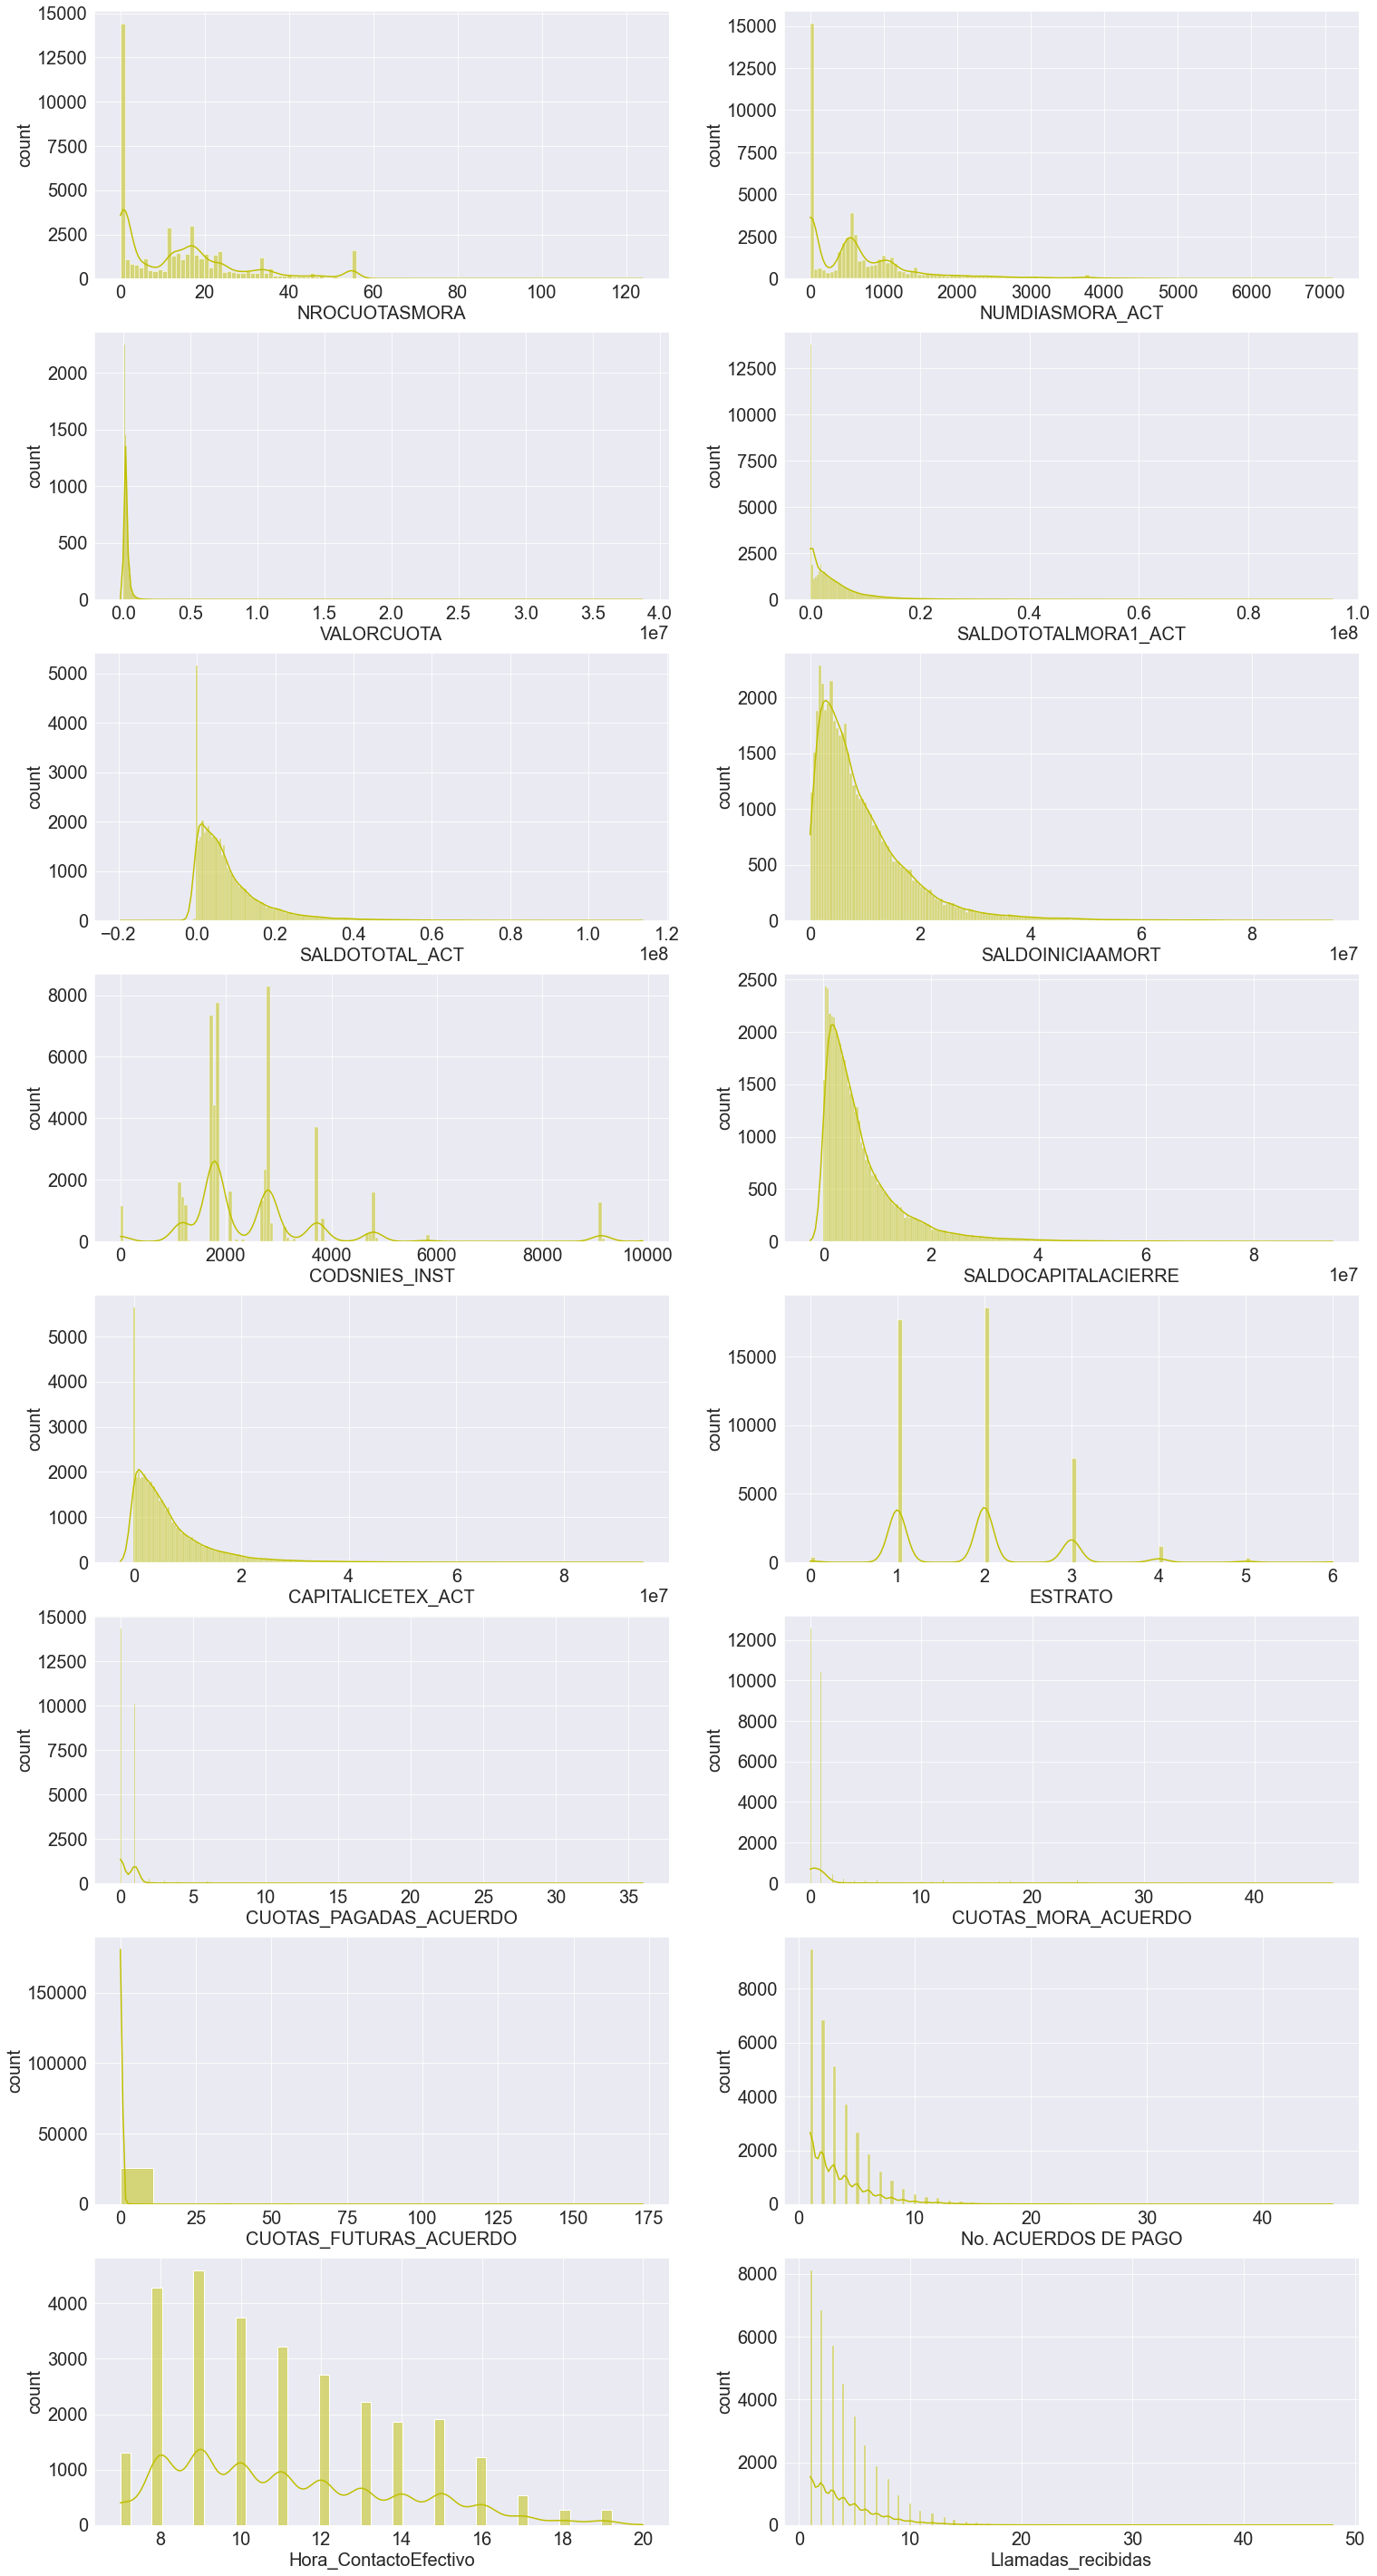

In [20]:
plt.rcParams.update({'font.size': 20})
var_hist = features_f
plt.figure(figsize=(25,6*len(features_f)/2))
for i,var in enumerate(var_hist):
    plt.subplot(round(len(features_f)/2),2,i+1)
    sns.histplot(df[var], color='y', kde=True)
    plt.xlabel(var)
    plt.ylabel("count")
plt.title("Distribución de Variables Numericas")

# Matriz de Correlación

Text(0.5, 1.0, 'Correlación de variables numericas')

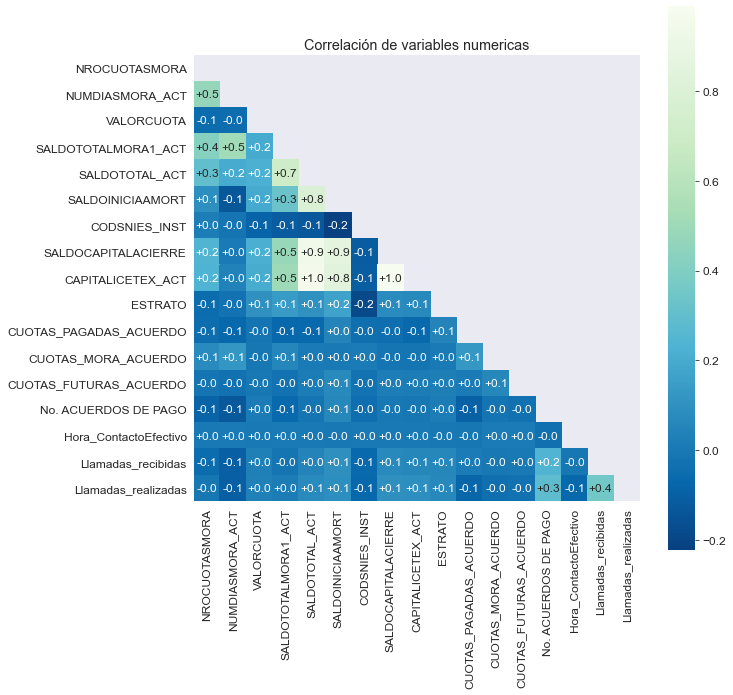

In [21]:
plt.rcParams.update({'font.size': 12})
#compute correlation matrix
df_correlations = df[list(features_f)].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))
sns.heatmap(df_correlations, mask=mask, cmap="GnBu_r",#"RdYlBu", 
    annot=True, square=True,
    #vmin=-0.9, vmax=0.9,
    fmt="+.1f")
plt.title("Correlación de variables numericas")

# Variables categoricas

In [22]:
features_o

Index(['CALIFICACIONACTUAL', 'DEPTORESIDENCIA', 'MUNICRESIDENCIA', 'IES',
       'NOMBREPROGRAMA', 'NIVELDEFORMACION', 'LINEA', 'TIPOCARTERA',
       'ESTADOACTUAL', 'SUBLINEA', 'SEXO', 'ESTADOCIVIL', 'TIPONOVEDAD',
       'Rangodiasmora', 'CONCEPTO', 'ESTADO_ACUERDO', 'TIPO_ACUERDO',
       'Valor Cuota Vigente', 'RazonSocial', 'UltimoPeriodoCotizado',
       'Tipificacion'],
      dtype='object')

Text(0.5, 1.0, "'NIVEL DE FORMACION'")

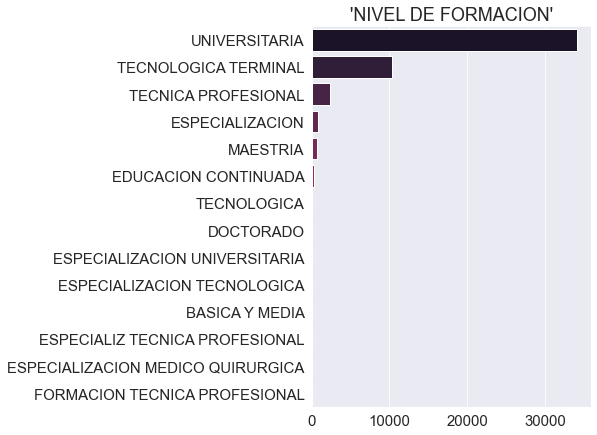

In [40]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(5,7))
a = pd.DataFrame(df['NIVELDEFORMACION'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['NIVELDEFORMACION']))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("'NIVEL DE FORMACION'")

Text(0.5, 1.0, 'Tipo de Acuerdo')

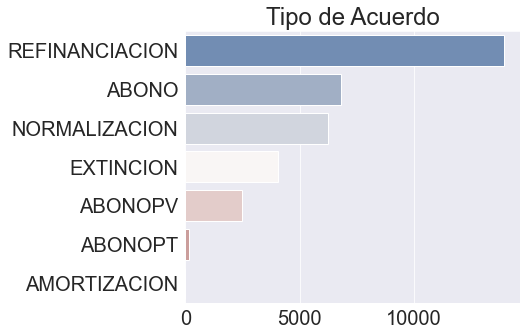

In [32]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(6,5))
a = pd.DataFrame(df['TIPO_ACUERDO'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['TIPO_ACUERDO']))
sns.barplot(x=x, y=y,  palette="vlag")
plt.title("Tipo de Acuerdo")

Text(0.5, 1.0, 'Genercación de edades')

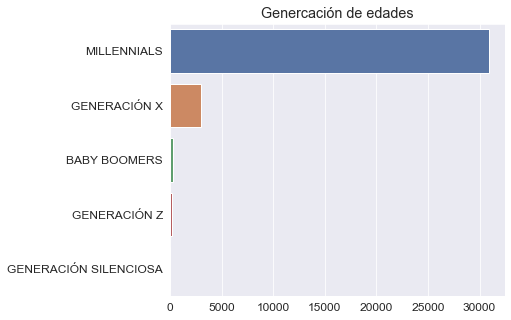

In [29]:
plt.figure(figsize=(6,5))
a = pd.DataFrame(df['CONCEPTO'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['CONCEPTO']))
sns.barplot(x=x, y=y, palette="deep")
plt.title('Genercación de edades')

df[features_o].value_counts()

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(25,6*len(features_o)/2))
for i,var in enumerate(features_o):
    plt.subplot(round(len(features_o)/2),2,i+1)
    a = pd.DataFrame(df[var].value_counts())
    y = np.array(list(a.index))
    x = np.array(list(a[var]))
    sns.barplot(x=x, y=y, palette="rocket")
    plt.xlabel(var)
    plt.ylabel("count")
    plt.xticks(rotation=45)
plt.title("Distribución de Variables Numericas", fontsize=20, verticalalignment='bottom')

In [71]:
features_f

Index(['NROCUOTASMORA', 'NUMDIASMORA_ACT', 'VALORCUOTA', 'SALDOTOTALMORA1_ACT',
       'SALDOTOTAL_ACT', 'SALDOINICIAAMORT', 'CODSNIES_INST',
       'SALDOCAPITALACIERRE', 'CAPITALICETEX_ACT', 'ESTRATO',
       'CUOTAS_PAGADAS_ACUERDO', 'CUOTAS_MORA_ACUERDO',
       'CUOTAS_FUTURAS_ACUERDO', 'No. ACUERDOS DE PAGO',
       'Hora_ContactoEfectivo', 'Llamadas_recibidas', 'Llamadas_realizadas'],
      dtype='object')

In [79]:
variables = ['NROCUOTASMORA', 'NUMDIASMORA_ACT', 'VALORCUOTA', 'SALDOTOTALMORA1_ACT',
       'SALDOTOTAL_ACT', 'SALDOINICIAAMORT', 'CODSNIES_INST',
       'SALDOCAPITALACIERRE', 'CAPITALICETEX_ACT', 'ESTRATO',
       'CUOTAS_PAGADAS_ACUERDO', 'CUOTAS_MORA_ACUERDO',
       'CUOTAS_FUTURAS_ACUERDO', 'No. ACUERDOS DE PAGO',
       'Hora_ContactoEfectivo', 'Llamadas_recibidas', 'Llamadas_realizadas','CALIFICACIONACTUAL',  'LINEA',
        'TIPOCARTERA', 'SEXO', 'ESTADOCIVIL', 'TIPONOVEDAD',
       'Rangodiasmora', 'CONCEPTO', 'ESTADO_ACUERDO', 'TIPO_ACUERDO']

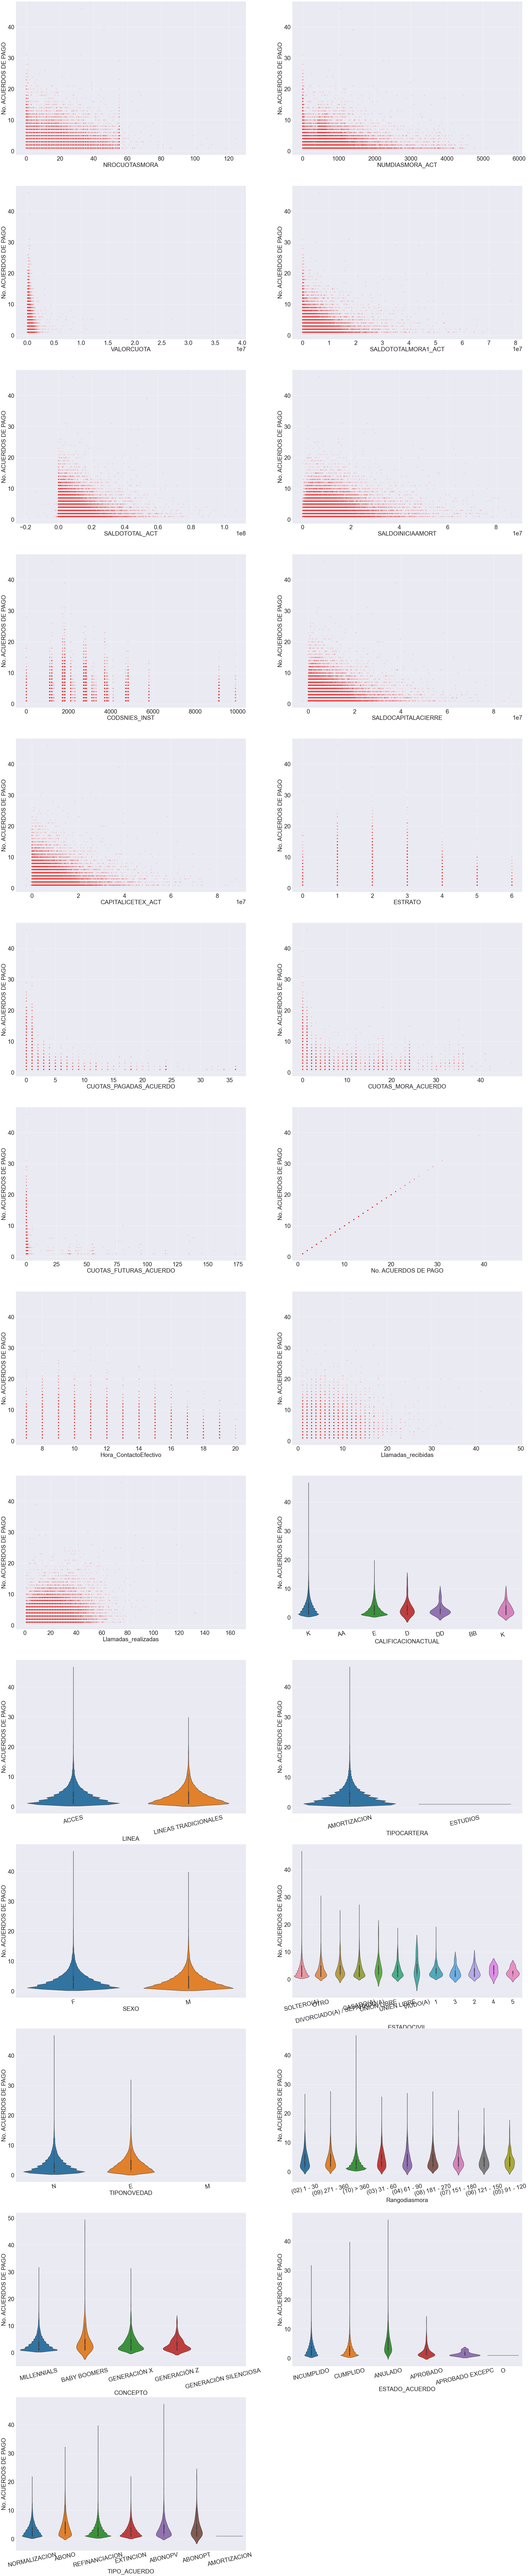

In [81]:
plt.rcParams.update({'font.size': 30})
hight = 17
wide = 23
col = 2
row = 16
plt.figure(figsize=(wide*col,hight*row))
for i,var in enumerate(variables):
    plt.subplot(row,col,i+1)
    if var in ['CALIFICACIONACTUAL', 'NIVELDEFORMACION', 'LINEA',
        'TIPOCARTERA','ESTADOACTUAL', 'SEXO', 'ESTADOCIVIL', 'TIPONOVEDAD',
       'Rangodiasmora', 'CONCEPTO', 'ESTADO_ACUERDO', 'TIPO_ACUERDO']:
        sns.violinplot(x=var, y='No. ACUERDOS DE PAGO', data=df)
        plt.xticks(rotation=12.5)
    else:
        sns.scatterplot(x=var,y='No. ACUERDOS DE PAGO',data=df, alpha=0.10,color='r')

Text(0.5, 1.0, 'Hora_ContactoEfectivo vs. ESTADO_ACUERDO')

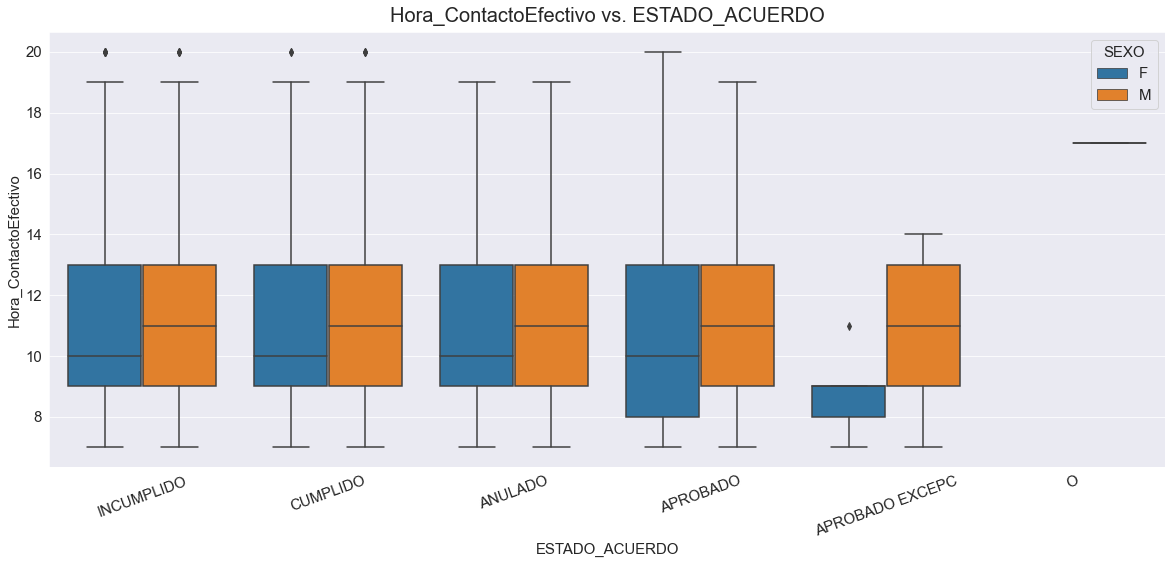

In [84]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,8))
sns.boxplot(x='ESTADO_ACUERDO', y='Hora_ContactoEfectivo', data=df, hue='SEXO')
plt.xticks(rotation=20)
plt.title("Hora_ContactoEfectivo vs. ESTADO_ACUERDO", fontsize=20, verticalalignment='bottom')

Text(0.5, 1.0, 'Hora_ContactoEfectivo vs. Generación')

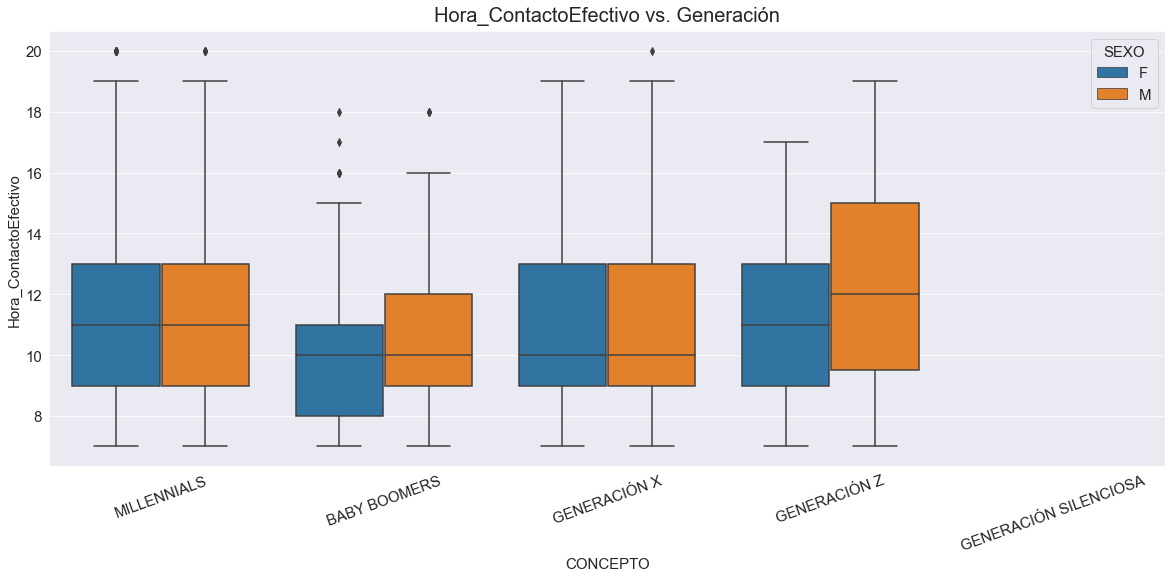

In [85]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,8))
sns.boxplot(x='CONCEPTO', y='Hora_ContactoEfectivo', data=df, hue='SEXO')
plt.xticks(rotation=20)
plt.title("Hora_ContactoEfectivo vs. Generación", fontsize=20, verticalalignment='bottom')

In [ ]:
ESTADOCIVIL

Text(0.5, 1.0, 'Hora_ContactoEfectivo vs. Generación')

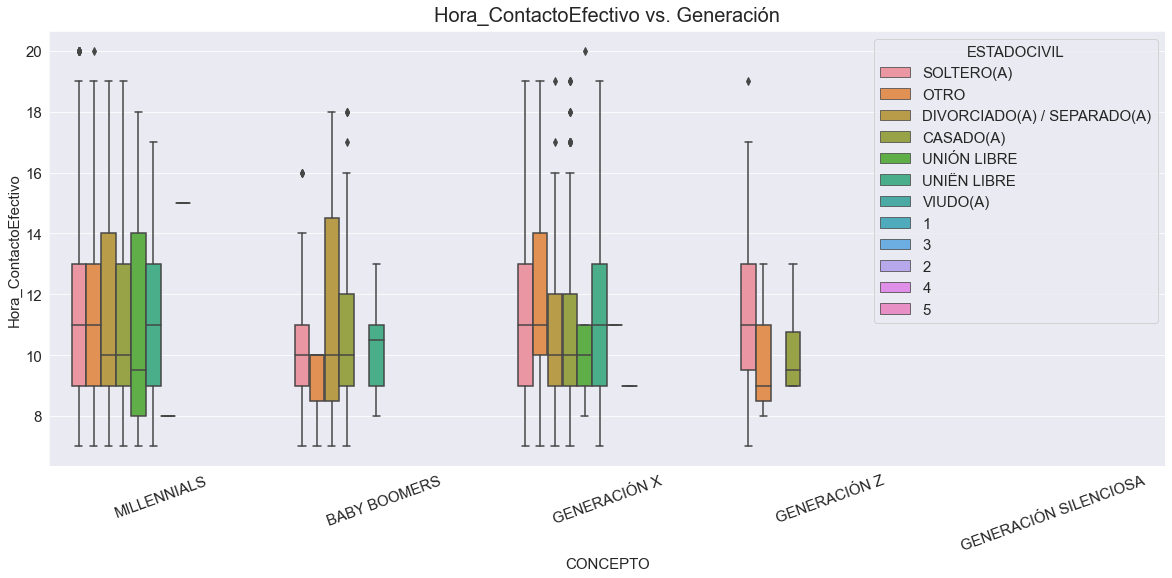

In [86]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,8))
sns.boxplot(x='CONCEPTO', y='Hora_ContactoEfectivo', data=df, hue='ESTADOCIVIL')
plt.xticks(rotation=20)
plt.title("Hora_ContactoEfectivo vs. Generación", fontsize=20, verticalalignment='bottom')